In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
path_gff_tes = 'data/results/all.noun.no00.gff'
path_gff_genes = 'data/results/circos/genes.gff3'
path_genome = 'data/Stuberosum_genome.gff3'
te_classes = ['TRIM', 'LARD','LTR','SINE', 'LINE','MITE', 'TIR','helitron']
#te_classes = ['TRIM']

In [24]:
df_genome = pd.read_csv(path_genome, sep='\t', header=None)
df_genome.columns = ['seqname' , 'source' , 'feature' , 'start' , 'end' , 'score' , 'strand' , 'frame' , 'attribute']

df_tes = pd.read_csv(path_gff_tes, sep='\t', header=None)
df_tes.columns = ['seqname' , 'source' , 'feature' , 'start' , 'end' , 'score' , 'strand' , 'frame' , 'attribute']

df_genes = pd.read_csv(path_gff_genes, sep='\t', header=None)
df_genes.columns = ['seqname' , 'source' , 'feature' , 'start' , 'end' , 'score' , 'strand' , 'frame' , 'attribute']


In [25]:
#load genome structure
df_genes_genome = {}
for k,chromosome in df_genome.iterrows():
    df_genes_genome[chromosome.seqname] = df_genes[(df_genes.seqname == chromosome.seqname)].reset_index()

In [33]:
distances_kb = {}
distances_kb_filtered = {}
for te_class in te_classes:
    #calculate distance to closest gene
    df_tes_class = df_tes[df_tes.attribute.str.contains(te_class + "_id")]
    distances = []
    for k,v in df_tes_class.iterrows():
        midd = (v.start + v.end) / 2
        df_curr = df_genes_genome[v.seqname]
        df_res = df_curr.loc[(df_curr.start - midd).abs().argsort()[:1]]
        if len(df_res.index) > 0:
            closest = (int(df_res.start) + int(df_res.end)) / 2
            distance = abs(midd - closest)
            distances.append(distance)
        else:
            print(v.seqname, midd)
            print(df_res)
            print(df_curr)
            print('error')
    count = 0
    for i in range(0,10000,1000):
        for distance in distances:
            if distance < 100:
                count += 1
    print(te_class, count)
    distances_kb[te_class] = []
    for d in distances:
        distances_kb[te_class].append(d/1000)
    #! pip3 install seaborn
    distances_kb_filtered[te_class] = []
    for distance_kb in distances_kb[te_class]:
        if distance_kb <= 500:
            distances_kb_filtered[te_class].append(distance_kb)

('TRIM', 76)
('LARD', 0)
('LTR', 572)
('SINE', 25)
('LINE', 2)
('MITE', 149)
('TIR', 34)
('helitron', 11)


IndexError: list index out of range

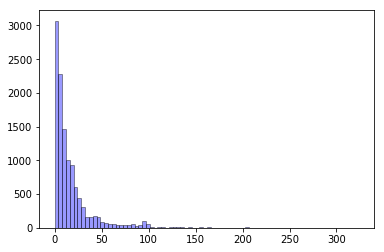

In [35]:
for te_class in te_classes:
    # seaborn histogram
    plt.figure()
 
    sns.distplot(distances_kb_filtered[te_class], hist=True, kde=False, 
                 bins=80, color = 'blue',
                 hist_kws={'edgecolor':'black'},rug=False)
#    plt.ylim(0, 3500)
    plt.xlim(0, 400)

    # Add labels
    plt.title(te_class + ' distance to closest gene in the genome')
    plt.xlabel('Distance to closest gene (kb)')
    plt.ylabel('Number of ' + te_class)
    plt.savefig('data/results/plots/histogram' + te_class + '.png', dpi=800,bbox_inches='tight')



In [30]:
#distances_kb_filtered
import csv

In [32]:
with open('data/distances.csv', 'wb') as f:  # Just use 'w' mode in 3.x
    w = csv.DictWriter(f, distances_kb_filtered.keys())
    for d in distances_kb_filtered:
        w.writeheader()
        w.writerow(distances_kb_filtered)
